In [1]:
import numpy as np
from pathlib import Path

from pymor.basic import *
from pymor.core.pickle import load

from RBInvParam.problems.problems import build_InstationaryModelIP

set_log_levels({
    'pymor' : 'WARN'
})

set_defaults({})


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cm",
    "font.size": 10,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'figure.dpi': 400
})

In [3]:
#WORK_DIR = Path('/run/media/benedikt/38E84473425D444F/Dokumente/Studium/Mathematik/PhD/parabolische_inverse_probleme')
WORK_DIR = Path('/home/benedikt/Dokumente/parabolische_inverse_probleme')

method = 'TR_IRGNM'
#dump_path = WORK_DIR / Path('examples/diffusion/dumps') / f'20250204_121259_TR_IRGNM'
dump_path = WORK_DIR / Path('experiments/initial_testing_palma') / f'diffusion_TR_100'

setup_path = dump_path / 'setup.pkl'
optimizer_parameter_path = dump_path / 'optimizer_parameter.pkl'
data_path = dump_path / f'{method}_final.pkl'
final_data_path = dump_path / f'{method}_final.pkl'

with open(setup_path, 'rb') as file:
    setup = load(file)

with open(optimizer_parameter_path, 'rb') as file:
    optimizer_parameter = load(file)

if not 'FOM' in locals():
    FOM = build_InstationaryModelIP(setup=setup)

q_exact = setup['model_parameter']['q_exact']

with open(data_path, 'rb') as file:
    data = load(file)


if final_data_path.exists():
    with open(final_data_path, 'rb') as file:
        final_data = load(file)

[2025-02-06 13:55:09,384][__init__] - Setting up InstationaryModelIP
[2025-02-06 13:55:09,773][discretize_instationary_IP] - noise percentage is 2.1203e-07
[2025-02-06 13:55:09,774][discretize_instationary_IP] - noise_level is 1.0000e-05
[2025-02-06 13:55:09,796][__init__] - Setting up InstationaryModelIP


Accordion(children=(HTML(value='', layout=Layout(height='16em', width='100%')),), titles=('Log Output',))

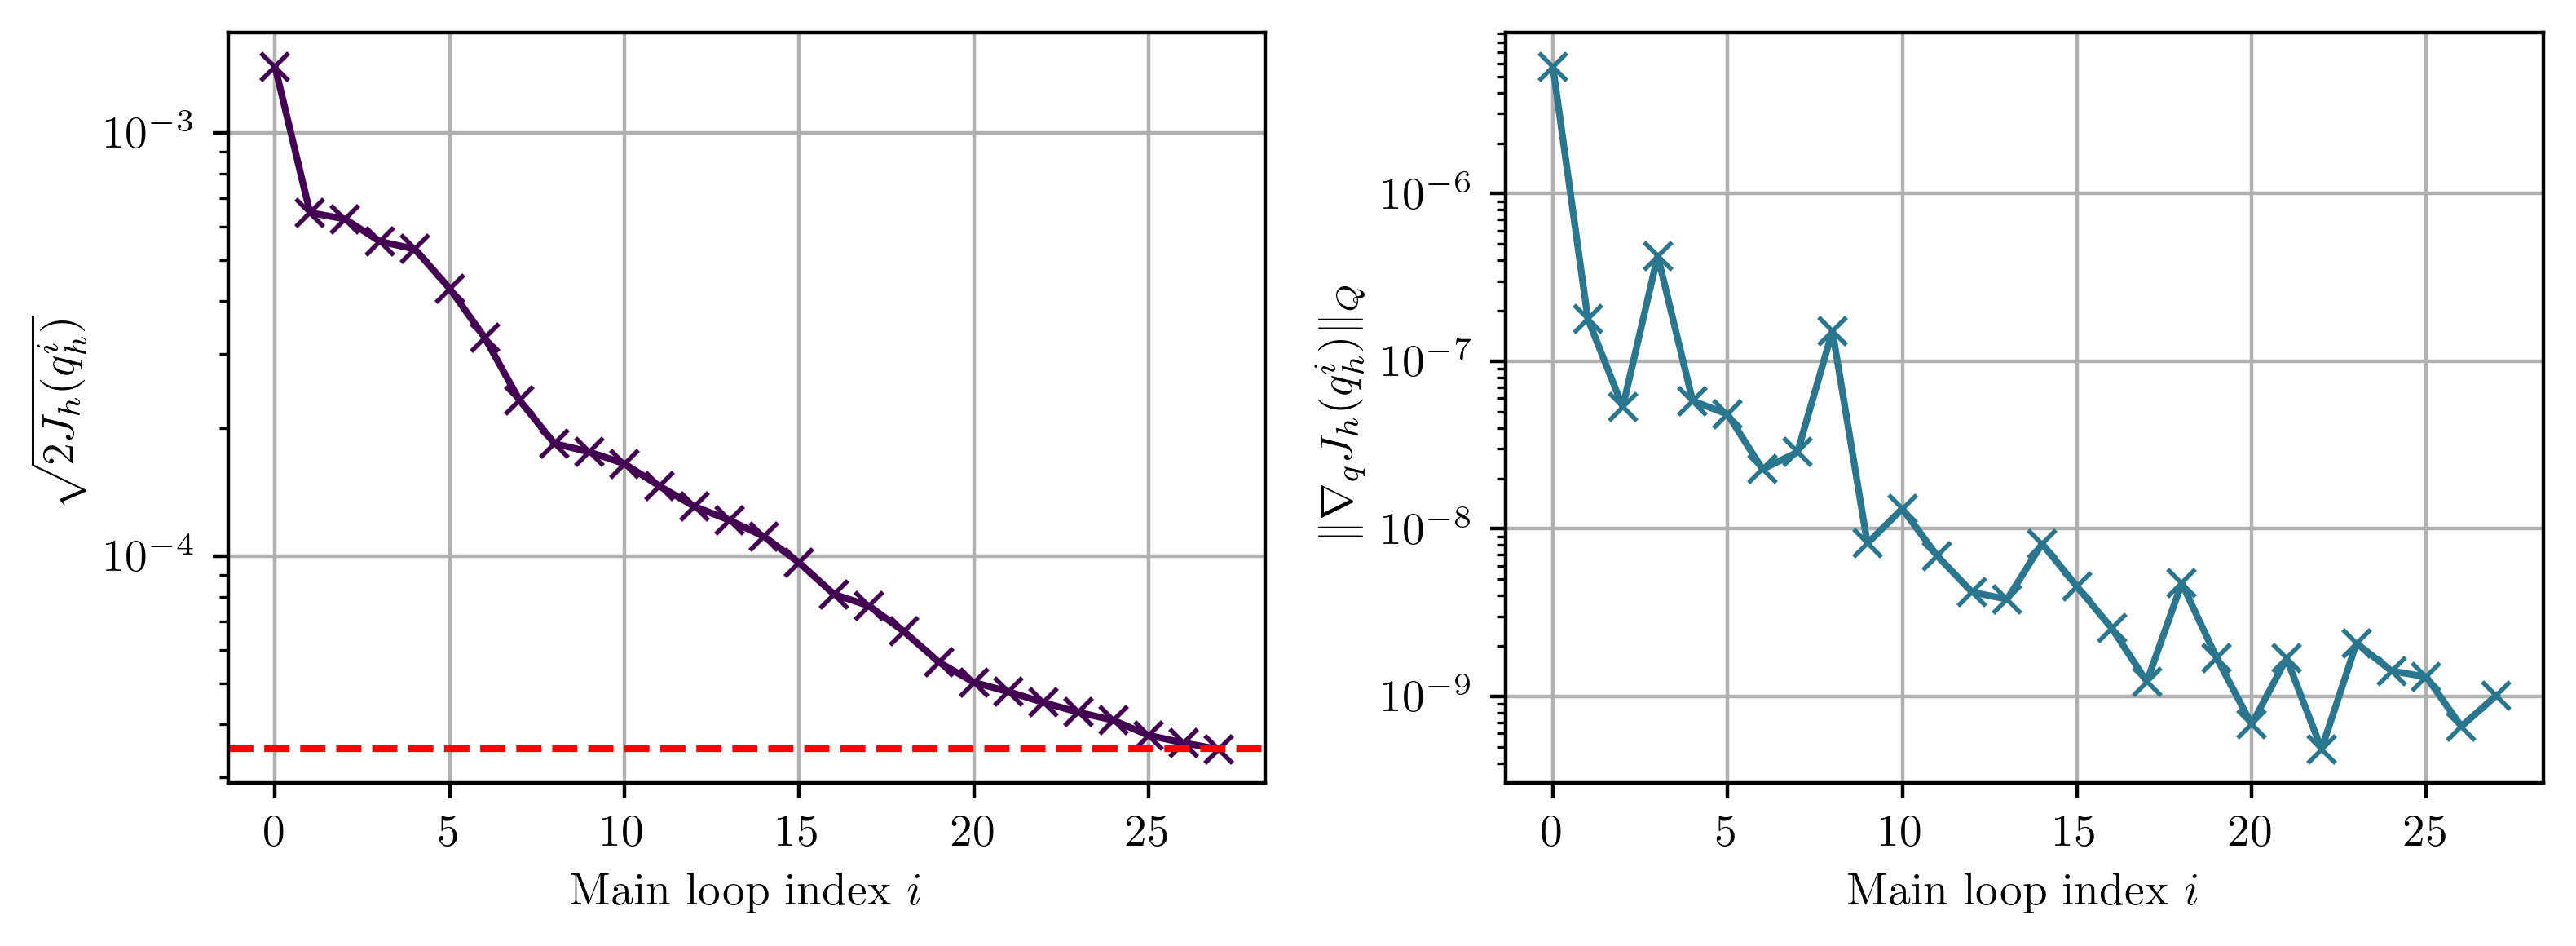

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3))
cmap = plt.get_cmap('viridis')

Js = np.array(data['J'])
norm_nabla_Js = np.array(data['norm_nabla_J'])
assert len(Js) == len(norm_nabla_Js)

ax[0].set_xlabel(r'$\textrm{Main loop index } i$')
ax[0].set_ylabel(r'$\sqrt{2J_h(q^i_h)}$')
ax[0].set_yscale('log')
ax[0].grid()
ax[0].plot(np.sqrt(2 * Js), marker='x',color=cmap(0))

tau = optimizer_parameter['tau']
noise_level = optimizer_parameter['noise_level']
tol = optimizer_parameter['tol']
y = tau * noise_level + tol
ax[0].axhline(y=y, color='r', linestyle='--')


ax[1].set_xlabel(r'$\textrm{Main loop index } i$')
if setup['model_parameter']['q_time_dep']:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{Q^{K}}$')
else:
    ax[1].set_ylabel(r'$\|\nabla_q J_h(q^i_h)\|_{Q}$')
    
ax[1].set_yscale('log')
ax[1].grid()
ax[1].plot(norm_nabla_Js, marker='x',color=cmap(100))
##############################


plt.tight_layout()
plt.show()

In [5]:
val = data['q'][-1]
rel = q_exact

if setup['model_parameter']['q_time_dep']:
    x = FOM.products['bochner_prod_Q'].apply2(rel-val, rel-val)[0,0]
    y = FOM.products['bochner_prod_Q'].apply2(rel, rel)[0,0]
else:
    x = FOM.products['prod_Q'].apply2(rel-val, rel-val)[0,0]
    y = FOM.products['prod_Q'].apply2(rel, rel)[0,0]
    
z = np.sqrt(x) / np.sqrt(y) * 100
print(f"{z:3.4} %")

90.4 %


In [7]:
int(np.ceil(data['total_runtime']))

5156

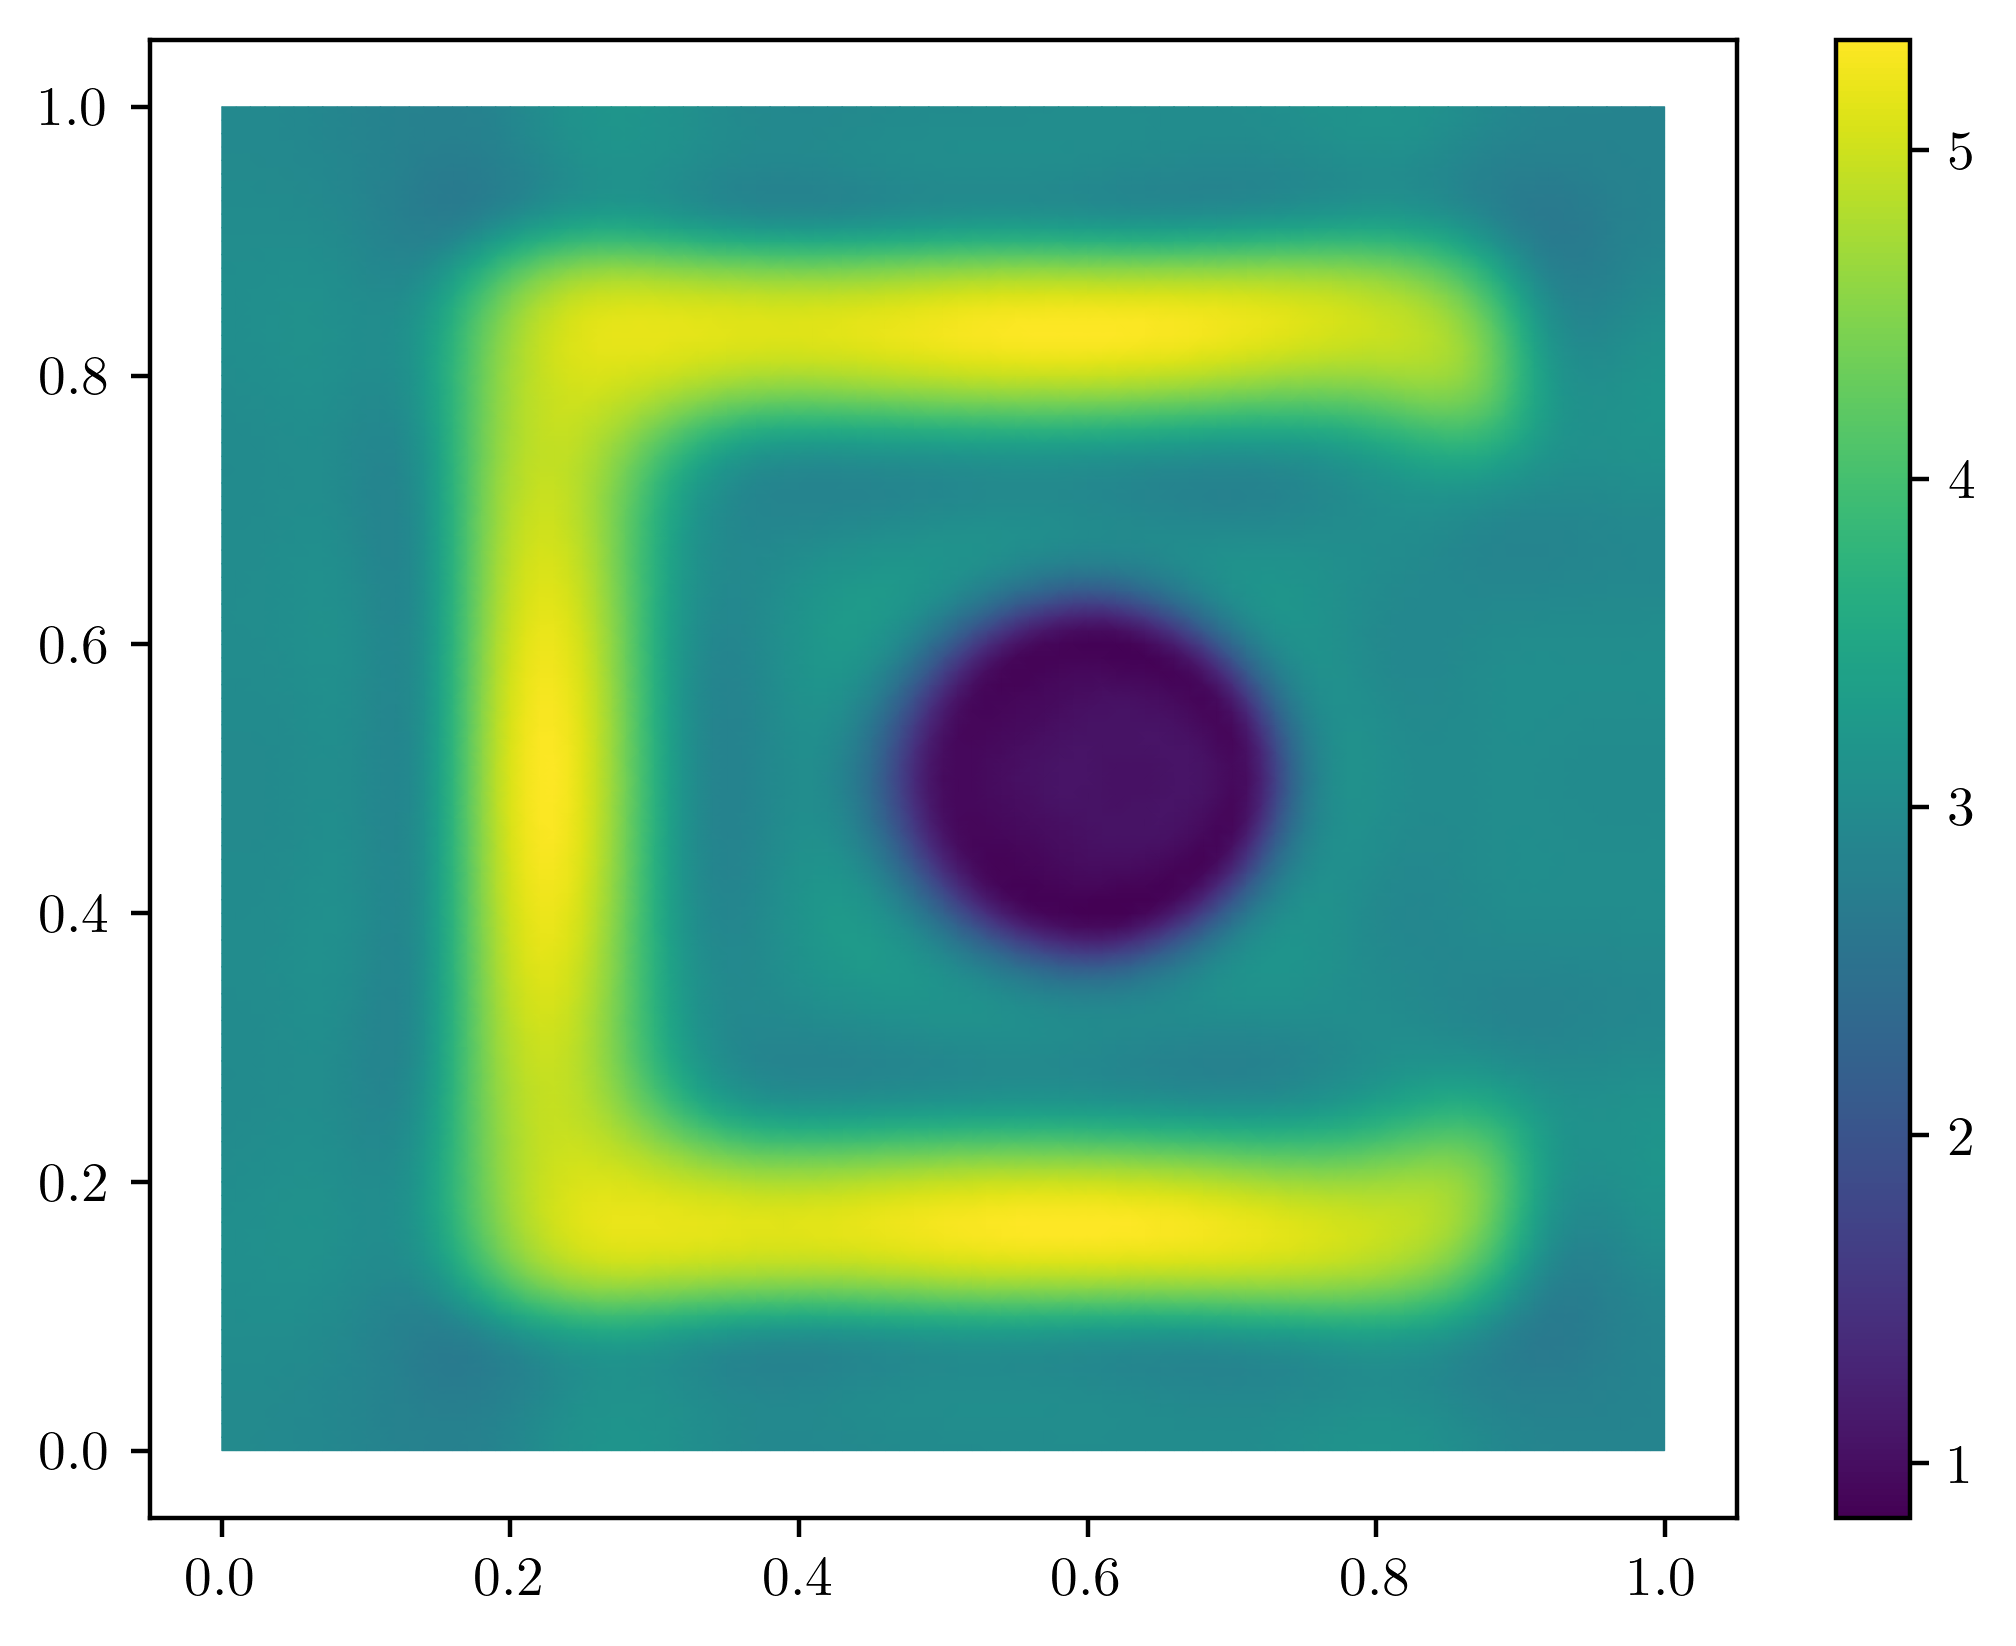

In [6]:
FOM.visualizer.visualize(data['q'][-1])